In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
from os import listdir, makedirs
from os.path import join, isfile, isdir, exists
from datetime import datetime
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import r2_score, confusion_matrix, precision_recall_fscore_support

!cp "/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/scripts/statistical_extensions.py" .
import statistical_extensions as SE

In [ ]:
# def met_to_intensity_ground(row):
#   ee = complete_df['waist_ee_final'][row.name]
#   return 1 if ee <= 1.5 else 2 if ee < 3 else 3

# def met_to_intensity_ground_cm(row):
#   ee = combined_data['waist_ee_final'][row.name]
#   return 1 if ee <= 1.5 else 2 if ee < 3 else 3

# def met_to_intensity_caron_1_cm(row):
#   ee = combined_data['EE_caron_1'][row.name]
#   return 1 if ee <= 1.5 else 2 if ee < 3 else 3

# def met_to_intensity_caron_1(row):
#   ee = complete_df['EE_caron_1'][row.name]
#   return 1 if ee <= 1.5 else 2 if ee < 3 else 3


In [ ]:
# numbs = [1,4,2,4,5,3,6,63,4.4,5,5,2.1]
# numba = [1.2,1.4,1.12,7.4,8.5,2.3,1.6,0.3,4.4,5.9,5,2.1]
numbs = [0.5]*10
numba = [0.8]*10
combined_data = pd.DataFrame()
combined_data['waist_ee_final'] = numbs
combined_data['EE_caron_1'] = numba
combined_data['cats_g'] = combined_data.apply(met_to_intensity_ground,axis=1)
combined_data['cats_p'] = combined_data.apply(met_to_intensity_caron_1,axis=1)
print(combined_data.head())

corr, p_val = SE.GeneralStats.pearson_correlation(combined_data['cats_g'], combined_data['cats_p'])
print(corr, p_val)

NameError: ignored

In [ ]:
# a = [1,1,1,1,1,1,1]
# b = [1,1,1,1,1,1,1]
# cnf_matrix = confusion_matrix(a,b)
# print(cnf_matrix)
# stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
# print(stats)

all_df = pd.DataFrame()
for i in range(5):
  s = pd.DataFrame([i]*5)
  # print(s)
  all_df = pd.concat([all_df,s])
  # print("***")
  # print(len(all_df))
stats = SE.GeneralStats.evaluation_statistics([])



AttributeError: ignored

In [16]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], '.3f'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        print(title + ' confusion matrix')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+title+'.png')

Sensitivity	[0.5509, 0.88861, 0.00388]
Sensitivity CI	[(0.55074, 0.55106), (0.88843, 0.88879), (0.00377, 0.00399)]
Specificity	[0.8961, 0.53707, 0.99825]
Specificity CI	[(0.89593, 0.89627), (0.53692, 0.53723), (0.99823, 0.99826)]
Normalized confusion matrix
[[0.55090037 0.44770074 0.00139889]
 [0.10844515 0.88860874 0.00294611]
 [0.06211475 0.93400853 0.00387672]]


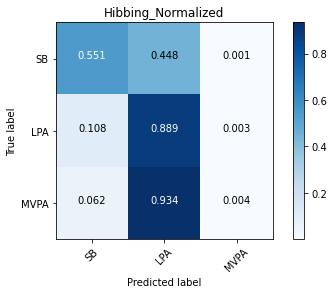

Hibbing confusion matrix
[[21100498 17147762    53580]
 [ 1234596 10116384    33540]
 [   76908  1156452     4800]]


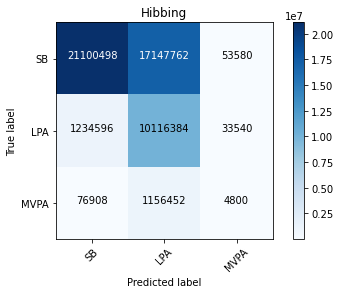

<Figure size 432x288 with 0 Axes>

In [17]:



def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    
    cnf_entire = [[21100498,17147762,53580],[1234596,10116384,33540],[76908,1156452,4800]]
    cnf_entire = np.array(cnf_entire)

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')

    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Hibbing'
plot_name = 'Hibbing'
g_lablel = 'waist_ee'
p_label = 'EE_caron_1'

entire_stats(model_name,plot_name,g_lablel,p_label)

Evaluate results Caron


Pearsons correlation caron 1: 0.292
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 1: nan


/content/statistical_extensions.py:410: RuntimeWarning: invalid value encountered in long_scalars
  precisionB = tpb / (tpb + eab + ecb)
/content/statistical_extensions.py:424: RuntimeWarning: invalid value encountered in long_scalars
  precisionC = tpc / (tpc + eac + ebc)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: inval

Pearsons correlation caron 1: -0.071
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan


/content/statistical_extensions.py:396: RuntimeWarning: invalid value encountered in long_scalars
  precisionA = tpa / (tpa + eba + eca)


Pearsons correlation caron 1: 0.623
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: 0.328
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.046
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.022
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: 0.280
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI

/content/statistical_extensions.py:484: RuntimeWarning: invalid value encountered in long_scalars
  precisionA = tpa / (tpa + eba)


Pearsons correlation caron 1: 0.072
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.385
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: 0.048
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.014
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.233
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity C

/content/statistical_extensions.py:498: RuntimeWarning: invalid value encountered in long_scalars
  precisionB = tpb / (tpb + eab)


Pearsons correlation caron 1: -0.069
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: 0.011
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caron 1: -0.009
Sensitivity	[0.99077, 0.00144, 0.0]
Sensitivity CI	[(0.98902, 0.99252), (-0.00138, 0.00425), (0.0, 0.0)]
Specificity	[0.00413, 0.99062, 1.0]
Specificity CI	[(-0.00053, 0.0088), (0.98886, 0.99238), (1.0, 1.0)]
Spearman correlation caron 1: -0.012
Pearsons correlation caron 1: -0.200
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 1: nan
Pearsons correlation caro

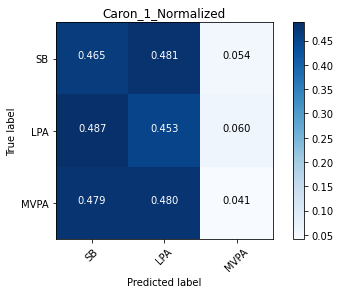

Caron_1 confusion matrix
[[578792 598502  67580]
 [175651 163085  21588]
 [ 18113  18165   1566]]


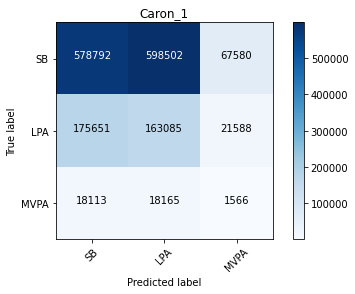

<Figure size 432x288 with 0 Axes>

In [22]:
import csv

def met_to_intensity_ground_cm_caron(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_caron_1_cm(row):
  ee = combined_data['EE_caron_1'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

evaluation_results_hip = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hip_results/'

combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/Epoch30/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'caron_hip.csv'
f = open(results_file, 'w')
writer = csv.writer(f)


#add
writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()





for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_caron,axis=1)
    predictions_hip = combined_data['EE_caron_1']
    predicted_intensity = combined_data.apply(met_to_intensity_caron_1_cm,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
 
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['EE_caron_1']
  try:
    corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
    print('Pearsons correlation caron 1: %.3f' % corr)
  except:
    corr = None
    print('Pearsons correlation caron 1: None')
  


  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))

  #add
  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation caron 1: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

 

f.close()

print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Caron_1'
plot_name = 'Caron_1'
g_lablel = 'waist_ee'
p_label = 'EE_caron_1'

entire_stats(model_name,plot_name,g_lablel,p_label)


In [ ]:

for row in [[1,2,3],[1,2,3],[1,2,3],[1,2,3]]:
      writer.writerow(row)
f.close()

ValueError: ignored

Pearsons correlation caron 1: 0.292
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 2: nan


/content/statistical_extensions.py:410: RuntimeWarning: invalid value encountered in long_scalars
  precisionB = tpb / (tpb + eab + ecb)
/content/statistical_extensions.py:424: RuntimeWarning: invalid value encountered in long_scalars
  precisionC = tpc / (tpc + eac + ebc)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: inval

Pearsons correlation caron 1: -0.071
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan


/content/statistical_extensions.py:396: RuntimeWarning: invalid value encountered in long_scalars
  precisionA = tpa / (tpa + eba + eca)


Pearsons correlation caron 1: 0.623
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: 0.328
Sensitivity	[0.01667, 0.99947, 0.0]
Sensitivity CI	[(0.01361, 0.01973), (0.99873, 1.00021), (0.0, 0.0)]
Specificity	[0.99949, 0.01621, 1.0]
Specificity CI	[(0.99879, 1.0002), (0.01323, 0.01919), (1.0, 1.0)]
Spearman correlation caron 2: 0.076
Pearsons correlation caron 1: -0.046
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.022
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1:

/content/statistical_extensions.py:484: RuntimeWarning: invalid value encountered in long_scalars
  precisionA = tpa / (tpa + eba)


Pearsons correlation caron 1: 0.072
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.385
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: 0.048
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity CI	[(1.0, 1.0), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.0, 1.0, 1.0]
Specificity CI	[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.014
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.233
Sensitivity	[1.0, 0.0, 0.0]
Sensitivity C

/content/statistical_extensions.py:498: RuntimeWarning: invalid value encountered in long_scalars
  precisionB = tpb / (tpb + eab)


Pearsons correlation caron 1: -0.069
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: 0.011
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.009
Sensitivity	[0.99077, 0.0, 0.0]
Sensitivity CI	[(0.98902, 0.99252), (0.0, 0.0), (0.0, 0.0)]
Specificity	[0.00138, 0.99071, 1.0]
Specificity CI	[(-0.00132, 0.00408), (0.98896, 0.99246), (1.0, 1.0)]
Spearman correlation caron 2: -0.020
Pearsons correlation caron 1: -0.200
Sensitivity	[0.0, 1.0, 0.0]
Sensitivity CI	[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0)]
Specificity	[1.0, 0.0, 1.0]
Specificity CI	[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0)]
Spearman correlation caron 2: nan
Pearsons correlation caron 1: -0.001


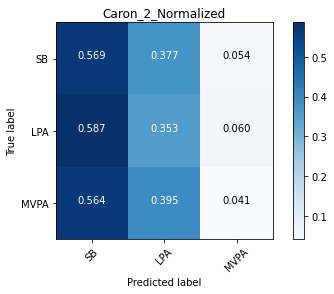

Caron_2 confusion matrix
[[708288 469006  67580]
 [211463 127273  21588]
 [ 21335  14943   1566]]


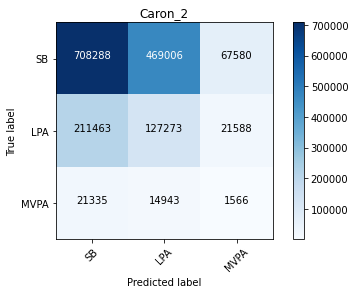

<Figure size 432x288 with 0 Axes>

In [23]:

def met_to_intensity_ground_cm_caron(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_caron_2_cm(row):
  ee = combined_data['EE_caron_2'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3



combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/Epoch30/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'caron_hip_2.csv'
f = open(results_file, 'w')
writer = csv.writer(f)

writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()


for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_caron,axis=1)
    predictions_hip = combined_data['EE_caron_2']
    predicted_intensity = combined_data.apply(met_to_intensity_caron_2_cm,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['EE_caron_2']
  # corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
  try:
    corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
    print('Pearsons correlation caron 1: %.3f' % corr)
  except:
    corr = None
    print('Pearsons correlation caron 1: None')


  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))


  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation caron 2: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

f.close()


print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Caron_2'
plot_name = 'Caron_2'
g_lablel = 'waist_ee'
p_label = 'EE_caron_2'

entire_stats(model_name,plot_name,g_lablel,p_label)

Evaluate results Hibbing


In [11]:
import csv
def met_to_intensity_ground_cm_hibbing(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_hibbing(row):
  ee = combined_data['EE_hibbing'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3



evaluation_results_hip = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hip_results/'

combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hibbing/Epoch1/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]

combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'hibbing_hip_2.csv'
f = open(results_file, 'w')
writer = csv.writer(f)

writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()


for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_hibbing,axis=1)
    predictions_hip = combined_data['EE_hibbing']
    predicted_intensity = combined_data.apply(met_to_intensity_hibbing,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['EE_hibbing']
  try:
    corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
    print('Pearsons correlation caron 1: %.3f' % corr)
  except:
    corr = None
    print('Pearsons correlation caron 1: None')


  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))
  


  # for combined_file in combined_data_files:
  #   combined_data = pd.read_csv(combined_results_folder + combined_file)
  #   ground_truths = combined_data['waist_ee_final']
  #   predictions_thigh = combined_data['predicted_ee_montoye_2015_feature_set_2']
    
  #   corr, _ = pearsonr(ground_truths, predictions_thigh) 
  #   print('Pearsons correlation ANN hip 2015 feature set 2: %.3f' % corr) 

  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation Hibbing: %.3f' % scorr)
  if(cnf_matrix.shape[0]==3):
  
    results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                    str(stats['specificity_ci']),cnf_matrix[0][0],cnf_matrix[0][1],cnf_matrix[0][2],cnf_matrix[1][0],cnf_matrix[1][1],cnf_matrix[1][2],
                  cnf_matrix[2][0],cnf_matrix[2][1],cnf_matrix[2][2]]
  else:

    results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                    str(stats['specificity_ci'])]
  writer.writerow(results_row)
  # entire_df = pd.concat([entire_df, complete_df])
  
  

f.close()

# print('*****complete stats*****')

# def entire_stats(model_name,plot_name,g_label,p_label):
#     ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

#     ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
#     preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


#     corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
#     print('Pearsons correlation '+model_name+' : %.3f' % corr)
#     ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
#     ground_intensity = entire_df['ground_intensity']
#     predicted_intensity = entire_df['predicted_intensity']
#     cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

#     stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
#     print('Sensitivity' + '\t' + str(stats['sensitivity']))
#     print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
#     print('Specificity' + '\t' + str(stats['specificity']))
#     print('Specificity CI' + '\t' + str(stats['specificity_ci']))

#     ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
#     ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
#     ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
#     ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


#     scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
#     print('Spearman correlation '+model_name+' : %.3f' % scorr)
#     ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
#     ff.close()

#     class_names = ['SB', 'LPA', 'MVPA']
#     plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
#     plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

# model_name = 'Hibbing'
# plot_name = 'Hibbing'
# g_lablel = 'waist_ee'
# p_label = 'EE_hibbing'

# entire_stats(model_name,plot_name,g_lablel,p_label)





Pearsons correlation caron 1: 0.076
Sensitivity	[0.5615, 0.53941, 0.0]
Sensitivity CI	[(0.55863, 0.56438), (0.53379, 0.54502), (0.0, 0.0)]
Specificity	[0.53675, 0.56062, 1.0]
Specificity CI	[(0.5313, 0.5422), (0.55777, 0.56347), (1.0, 1.0)]
Spearman correlation Hibbing: 0.081


/content/statistical_extensions.py:424: RuntimeWarning: invalid value encountered in long_scalars
  precisionC = tpc / (tpc + eac + ebc)


Pearsons correlation caron 1: 0.159
Sensitivity	[0.62507, 0.81981, 0.0]
Sensitivity CI	[(0.62357, 0.62657), (0.81445, 0.82517), (0.0, 0.0)]
Specificity	[0.82382, 0.62273, 1.0]
Specificity CI	[(0.81875, 0.8289), (0.62124, 0.62423), (1.0, 1.0)]
Spearman correlation Hibbing: 0.202
Pearsons correlation caron 1: 0.375
Sensitivity	[0.76949, 0.80251, 0.0]
Sensitivity CI	[(0.76801, 0.77098), (0.80023, 0.80478), (0.0, 0.0)]
Specificity	[0.79317, 0.74246, 1.0]
Specificity CI	[(0.79101, 0.79533), (0.74096, 0.74396), (1.0, 1.0)]
Spearman correlation Hibbing: 0.521
Pearsons correlation caron 1: 0.501
Sensitivity	[0.77879, 0.78319, 0.0]
Sensitivity CI	[(0.77713, 0.78045), (0.78082, 0.78555), (0.0, 0.0)]
Specificity	[0.80273, 0.74022, 1.0]
Specificity CI	[(0.80056, 0.8049), (0.73851, 0.74193), (1.0, 1.0)]
Spearman correlation Hibbing: 0.566
Pearsons correlation caron 1: 0.521
Sensitivity	[0.7676, 0.93092, 0.0]
Sensitivity CI	[(0.76608, 0.76912), (0.92902, 0.93281), (0.0, 0.0)]
Specificity	[0.93106, 0

Evaluate results Montoye ANN 2015 feature set 2

Pearsons correlation ANN hip 2015 feature set 2: 0.328
Sensitivity	[0.63624, 0.74905, 0.16514]
Sensitivity CI	[(0.62506, 0.64741), (0.73397, 0.76414), (0.11585, 0.21443)]
Specificity	[0.83097, 0.65876, 0.95229]
Specificity CI	[(0.81836, 0.84359), (0.64791, 0.66961), (0.94818, 0.95641)]
Spearman correlation ANN hip 2015 feature set 2: 0.428
Pearsons correlation ANN hip 2015 feature set 2: 0.292
Sensitivity	[0.5691, 0.33759, 0.88053]
Sensitivity CI	[(0.55657, 0.58162), (0.298, 0.37718), (0.83824, 0.92282)]
Specificity	[0.86563, 0.67603, 0.86955]
Specificity CI	[(0.84161, 0.88966), (0.66441, 0.68765), (0.86139, 0.8777)]
Spearman correlation ANN hip 2015 feature set 2: 0.373
Pearsons correlation ANN hip 2015 feature set 2: -0.193
Sensitivity	[0.25155, 0.61615, 0.01752]
Sensitivity CI	[(0.2426, 0.2605), (0.60194, 0.63037), (0.00808, 0.02696)]
Specificity	[0.85504, 0.62825, 0.64354]
Specificity CI	[(0.84551, 0.86458), (0.61867, 0.63783), (0.63547, 0.65162)]
Spearman correlation ANN hip 2015 

/content/statistical_extensions.py:427: RuntimeWarning: invalid value encountered in long_scalars
  sensitivityC = tpc / (tpc + eca + ecb)


Pearsons correlation ANN hip 2015 feature set 2: 0.146
Sensitivity	[0.64132, 0.25535, 0.54167]
Sensitivity CI	[(0.63301, 0.64963), (0.2241, 0.2866), (0.40071, 0.68263)]
Specificity	[0.44724, 0.68712, 0.94757]
Specificity CI	[(0.41269, 0.48178), (0.6791, 0.69514), (0.94382, 0.95132)]
Spearman correlation ANN hip 2015 feature set 2: 0.067
Pearsons correlation ANN hip 2015 feature set 2: 0.414
Sensitivity	[0.39149, 0.58646, 0.53947]
Sensitivity CI	[(0.38169, 0.40128), (0.5653, 0.60761), (0.48344, 0.59551)]
Specificity	[0.88935, 0.4428, 0.90904]
Specificity CI	[(0.87677, 0.90194), (0.43298, 0.45261), (0.90381, 0.91426)]
Spearman correlation ANN hip 2015 feature set 2: 0.344
Pearsons correlation ANN hip 2015 feature set 2: 0.077
Sensitivity	[0.59274, 0.41549, 0.5]
Sensitivity CI	[(0.58382, 0.60166), (0.33444, 0.49655), (0.09992, 0.90008)]
Specificity	[0.69595, 0.67244, 0.91795]
Specificity CI	[(0.62183, 0.77006), (0.66392, 0.68096), (0.913, 0.9229)]
Spearman correlation ANN hip 2015 feature

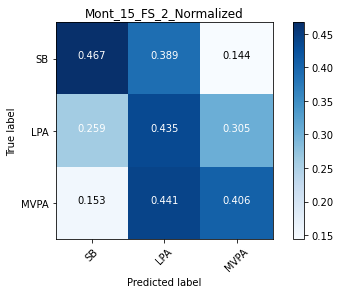

Mont_15_FS_2 confusion matrix
[[579726 483064 179044]
 [ 92934 155882 109398]
 [  5777  16588  15283]]


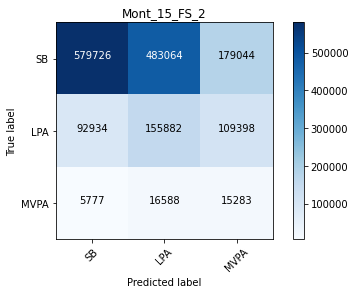

<Figure size 432x288 with 0 Axes>

In [24]:
import csv
def met_to_intensity_ground_cm_montoye(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_montoye_feature_2(row):
  ee = combined_data['predicted_ee_montoye_2015_feature_set_2'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

evaluation_results_hip = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hip_results/'

combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/combined_results_ANN_hip_2015/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]

combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'montoye_hip_2015_feature_set_2.csv'
f = open(results_file, 'w')
writer = csv.writer(f)

writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()

for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_montoye,axis=1)
    predictions_hip = combined_data['predicted_ee_montoye_2015_feature_set_2']
    predicted_intensity = combined_data.apply(met_to_intensity_montoye_feature_2,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['predicted_ee_montoye_2015_feature_set_2']
  corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
  # corr = 1
  print('Pearsons correlation ANN hip 2015 feature set 2: %.3f' % corr)


  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))



  # for combined_file in combined_data_files:
  #   combined_data = pd.read_csv(combined_results_folder + combined_file)
  #   ground_truths = combined_data['waist_ee_final']
  #   predictions_thigh = combined_data['predicted_ee_montoye_2015_feature_set_2']
    
  #   corr, _ = pearsonr(ground_truths, predictions_thigh) 
  #   print('Pearsons correlation ANN hip 2015 feature set 2: %.3f' % corr) 

  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation ANN hip 2015 feature set 2: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

f.close()



print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Mont_15_FS_2'
plot_name = 'Mont_15_FS_2'
g_lablel = 'waist_ee'
p_label = 'predicted_ee_montoye_2015_feature_set_2'

entire_stats(model_name,plot_name,g_lablel,p_label)

Evaluate results Montoye ANN 2015 feature set 3

Pearsons correlation ANN hip 2015 feature set 3: 0.134
Sensitivity	[0.18006, 0.47825, 0.38532]
Sensitivity CI	[(0.17113, 0.18898), (0.46086, 0.49563), (0.32072, 0.44993)]
Specificity	[0.8295, 0.32911, 0.79343]
Specificity CI	[(0.81684, 0.84216), (0.31836, 0.33986), (0.78561, 0.80125)]
Spearman correlation ANN hip 2015 feature set 3: 0.175
Pearsons correlation ANN hip 2015 feature set 3: 0.260
Sensitivity	[0.60157, 0.35766, 0.54425]
Sensitivity CI	[(0.58918, 0.61395), (0.31753, 0.3978), (0.47931, 0.60918)]
Specificity	[0.86047, 0.70972, 0.85795]
Specificity CI	[(0.83605, 0.88488), (0.69845, 0.72099), (0.8495, 0.8664)]
Spearman correlation ANN hip 2015 feature set 3: 0.347
Pearsons correlation ANN hip 2015 feature set 3: 0.047
Sensitivity	[0.29021, 0.41722, 0.27898]
Sensitivity CI	[(0.28085, 0.29957), (0.40281, 0.43164), (0.2467, 0.31125)]
Specificity	[0.69977, 0.47257, 0.79019]
Specificity CI	[(0.68736, 0.71219), (0.46267, 0.48247), (0.78333, 0.79706)]
Spearman correlation ANN hip 2015 

/content/statistical_extensions.py:427: RuntimeWarning: invalid value encountered in long_scalars
  sensitivityC = tpc / (tpc + eca + ecb)


Pearsons correlation ANN hip 2015 feature set 3: 0.220
Sensitivity	[0.54744, 0.24733, 0.60417]
Sensitivity CI	[(0.53882, 0.55607), (0.21641, 0.27825), (0.46582, 0.74251)]
Specificity	[0.84673, 0.67754, 0.84426]
Specificity CI	[(0.82171, 0.87176), (0.66946, 0.68563), (0.83815, 0.85037)]
Spearman correlation ANN hip 2015 feature set 3: 0.250
Pearsons correlation ANN hip 2015 feature set 3: 0.349
Sensitivity	[0.64793, 0.21998, 0.75329]
Sensitivity CI	[(0.63835, 0.65752), (0.20219, 0.23777), (0.70483, 0.80175)]
Specificity	[0.89732, 0.79323, 0.76102]
Specificity CI	[(0.88514, 0.9095), (0.78523, 0.80123), (0.75326, 0.76877)]
Spearman correlation ANN hip 2015 feature set 3: 0.502
Pearsons correlation ANN hip 2015 feature set 3: 0.123
Sensitivity	[0.29864, 0.33803, 0.66667]
Sensitivity CI	[(0.29034, 0.30695), (0.26022, 0.41583), (0.28946, 1.04387)]
Specificity	[0.77027, 0.3622, 0.93228]
Specificity CI	[(0.7025, 0.83804), (0.35348, 0.37093), (0.92774, 0.93681)]
Spearman correlation ANN hip 201

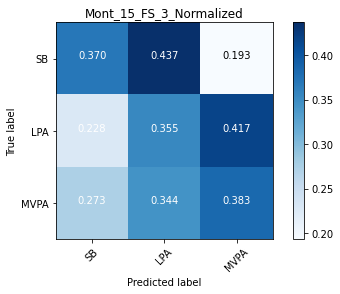

Mont_15_FS_3 confusion matrix
[[459591 542469 239774]
 [ 81777 127116 149321]
 [ 10264  12961  14423]]


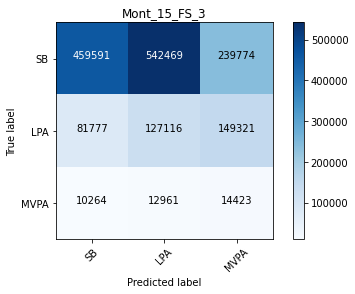

<Figure size 432x288 with 0 Axes>

In [26]:

def met_to_intensity_ground_cm_montoye(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_montoye_feature_3(row):
  ee = combined_data['predicted_ee_montoye_2015_feature_set_3'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3


combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/combined_results_ANN_hip_2015/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'montoye_hip_2015_feature_set_3.csv'
f = open(results_file, 'w')
writer = csv.writer(f)
writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()


for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_montoye,axis=1)
    predictions_hip = combined_data['predicted_ee_montoye_2015_feature_set_3']
    predicted_intensity = combined_data.apply(met_to_intensity_montoye_feature_3,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['predicted_ee_montoye_2015_feature_set_3']
  corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
  print('Pearsons correlation ANN hip 2015 feature set 3: %.3f' % corr)


  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))

  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation ANN hip 2015 feature set 3: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

f.close()


print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Mont_15_FS_3'
plot_name = 'Mont_15_FS_3'
g_lablel = 'waist_ee'
p_label = 'predicted_ee_montoye_2015_feature_set_3'

entire_stats(model_name,plot_name,g_lablel,p_label)

Evaluate results Montoye ANN 2015 feature set 1

Pearsons correlation ANN hip 2015 feature set 1: 0.156
Sensitivity	[0.18862, 0.09111, 0.86239]
Sensitivity CI	[(0.17954, 0.19771), (0.0811, 0.10112), (0.81665, 0.90812)]
Specificity	[0.87906, 0.88321, 0.27876]
Specificity CI	[(0.86808, 0.89003), (0.87586, 0.89056), (0.2701, 0.28742)]
Spearman correlation ANN hip 2015 feature set 3: 0.103
Pearsons correlation ANN hip 2015 feature set 1: 0.038
Sensitivity	[0.23976, 0.15693, 0.85398]
Sensitivity CI	[(0.22896, 0.25056), (0.12648, 0.18739), (0.80794, 0.90002)]
Specificity	[0.9199, 0.81595, 0.41227]
Specificity CI	[(0.90077, 0.93902), (0.80633, 0.82557), (0.40035, 0.42418)]
Spearman correlation ANN hip 2015 feature set 3: 0.143
Pearsons correlation ANN hip 2015 feature set 1: 0.326
Sensitivity	[0.32111, 0.12061, 0.83019]
Sensitivity CI	[(0.31148, 0.33074), (0.11108, 0.13013), (0.80317, 0.8572)]
Specificity	[0.83384, 0.84156, 0.42398]
Specificity CI	[(0.82376, 0.84392), (0.83431, 0.8488), (0.41565, 0.43231)]
Spearman correlation ANN hip 2015 

/content/statistical_extensions.py:427: RuntimeWarning: invalid value encountered in long_scalars
  sensitivityC = tpc / (tpc + eca + ecb)


Pearsons correlation ANN hip 2015 feature set 1: 0.181
Sensitivity	[0.15789, 0.06417, 0.875]
Sensitivity CI	[(0.15157, 0.1642), (0.04661, 0.08173), (0.78144, 0.96856)]
Specificity	[0.95729, 0.89885, 0.2507]
Specificity CI	[(0.94324, 0.97133), (0.89363, 0.90406), (0.2434, 0.258)]
Spearman correlation ANN hip 2015 feature set 3: 0.084
Pearsons correlation ANN hip 2015 feature set 1: -0.163
Sensitivity	[0.09184, 0.21662, 0.69408]
Sensitivity CI	[(0.08605, 0.09764), (0.19892, 0.23431), (0.64228, 0.74588)]
Specificity	[0.79464, 0.87696, 0.25258]
Specificity CI	[(0.77843, 0.81084), (0.87047, 0.88345), (0.24468, 0.26048)]
Spearman correlation ANN hip 2015 feature set 3: -0.184
Pearsons correlation ANN hip 2015 feature set 1: 0.038
Sensitivity	[0.17974, 0.10563, 0.83333]
Sensitivity CI	[(0.17277, 0.18671), (0.05508, 0.15619), (0.53513, 1.13154)]
Specificity	[0.88514, 0.89599, 0.28301]
Specificity CI	[(0.83376, 0.93651), (0.89045, 0.90153), (0.27489, 0.29114)]
Spearman correlation ANN hip 2015 

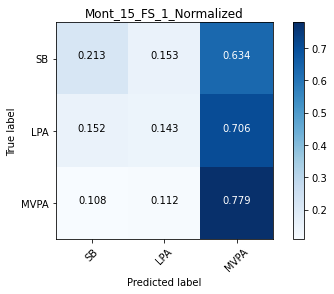

Mont_15_FS_1 confusion matrix
[[264954 189796 787084]
 [ 54328  51142 252744]
 [  4084   4223  29341]]


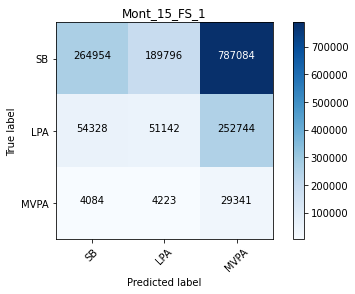

<Figure size 432x288 with 0 Axes>

In [27]:
import csv
def met_to_intensity_ground_cm_montoye(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_montoye_feature_1(row):
  ee = combined_data['predicted_ee_montoye_2015_feature_set_1'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

evaluation_results_hip = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hip_results/'

combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/combined_results_ANN_hip_2015/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'montoye_hip_2015_feature_set_1.csv'
f = open(results_file, 'w')
writer = csv.writer(f)
writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()


for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_montoye,axis=1)
    predictions_hip = combined_data['predicted_ee_montoye_2015_feature_set_1']
    predicted_intensity = combined_data.apply(met_to_intensity_montoye_feature_1,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['predicted_ee_montoye_2015_feature_set_1']
  try:
    corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
    print('Pearsons correlation ANN hip 2015 feature set 1: %.3f' % corr)
  except Exception:
    corr = None



  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))

  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation ANN hip 2015 feature set 3: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

f.close()


print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Mont_15_FS_1'
plot_name = 'Mont_15_FS_1'
g_lablel = 'waist_ee'
p_label = 'predicted_ee_montoye_2015_feature_set_1'

entire_stats(model_name,plot_name,g_lablel,p_label)

Evaluate results Montoye ANN 2015 feature set 4

Pearsons correlation ANN hip 2015 feature set 4: 0.246
Sensitivity	[0.59284, 0.41709, 0.44037]
Sensitivity CI	[(0.58142, 0.60425), (0.39993, 0.43425), (0.37447, 0.50627)]
Specificity	[0.65782, 0.63587, 0.89914]
Specificity CI	[(0.64185, 0.67379), (0.62486, 0.64688), (0.89333, 0.90496)]
Spearman correlation ANN hip 2015 feature set 4: 0.295
Pearsons correlation ANN hip 2015 feature set 4: 0.077
Sensitivity	[0.73293, 0.31387, 0.13274]
Sensitivity CI	[(0.72174, 0.74412), (0.27501, 0.35272), (0.08851, 0.17698)]
Specificity	[0.51938, 0.74952, 0.96292]
Specificity CI	[(0.48418, 0.55458), (0.73876, 0.76028), (0.95835, 0.9675)]
Spearman correlation ANN hip 2015 feature set 4: 0.196
Pearsons correlation ANN hip 2015 feature set 4: 0.630
Sensitivity	[0.71987, 0.22808, 0.96226]
Sensitivity CI	[(0.71061, 0.72913), (0.21581, 0.24035), (0.94855, 0.97598)]
Specificity	[0.78953, 0.77779, 0.79641]
Specificity CI	[(0.77849, 0.80058), (0.76955, 0.78603), (0.78962, 0.80319)]
Spearman correlation ANN hip 2

/content/statistical_extensions.py:427: RuntimeWarning: invalid value encountered in long_scalars
  sensitivityC = tpc / (tpc + eca + ecb)


Pearsons correlation ANN hip 2015 feature set 4: 0.309
Sensitivity	[0.90691, 0.2607, 0.6875]
Sensitivity CI	[(0.90187, 0.91194), (0.22923, 0.29216), (0.55637, 0.81863)]
Specificity	[0.57286, 0.92135, 0.9698]
Specificity CI	[(0.5385, 0.60723), (0.9167, 0.92601), (0.96692, 0.97268)]
Spearman correlation ANN hip 2015 feature set 4: 0.361
Pearsons correlation ANN hip 2015 feature set 4: 0.139
Sensitivity	[0.74229, 0.3098, 0.44079]
Sensitivity CI	[(0.73352, 0.75107), (0.28994, 0.32966), (0.38498, 0.4966)]
Specificity	[0.66639, 0.80634, 0.8827]
Specificity CI	[(0.64747, 0.68531), (0.79853, 0.81415), (0.87685, 0.88855)]
Spearman correlation ANN hip 2015 feature set 4: 0.379
Pearsons correlation ANN hip 2015 feature set 4: 0.037
Sensitivity	[0.68403, 0.19014, 0.5]
Sensitivity CI	[(0.67559, 0.69247), (0.1256, 0.25468), (0.09992, 0.90008)]
Specificity	[0.43919, 0.72226, 0.9594]
Specificity CI	[(0.35923, 0.51915), (0.71413, 0.73039), (0.95584, 0.96296)]
Spearman correlation ANN hip 2015 feature s

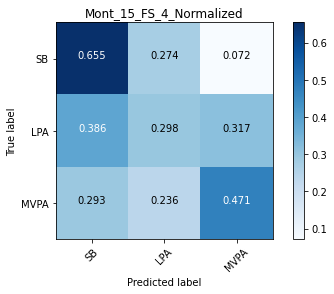

Mont_15_FS_4 confusion matrix
[[812858 339743  89233]
 [138241 106598 113375]
 [ 11031   8894  17723]]


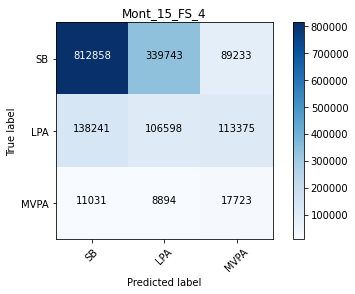

<Figure size 432x288 with 0 Axes>

In [28]:
import csv
def met_to_intensity_ground_cm_montoye(row):
  ee = combined_data['waist_ee'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

def met_to_intensity_montoye_feature_4(row):
  ee = combined_data['predicted_ee_montoye_2015_feature_set_4'][row.name]
  return 1 if ee <= 1.5 else 2 if ee < 3 else 3

evaluation_results_hip = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/hip_results/'

combined_results_folder = '/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/processed data/caron_and_montoye/combined_results_ANN_hip_2015/'
combined_data_files = [f for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = [f.split('_')[0] for f in listdir(combined_results_folder) if isfile(join(combined_results_folder, f))]
combined_ids = list(set(combined_ids))
results_file = evaluation_results_hip+'montoye_hip_2015_feature_set_4.csv'
f = open(results_file, 'w')
writer = csv.writer(f)
writer.writerow(
    ['Participant', 'Pearson_Correlation','Spearman_Correlation' ,'Sensitivity', 'Sensitivity CI', 'Specificity', 'Specificity CI'])
entire_df = pd.DataFrame()


for each_id in combined_ids:
  complete_df = pd.DataFrame()
  # print(combined_data_files)
  for combined_file in combined_data_files:
    if(combined_file.split('_')[0] != each_id):continue
    combined_data = pd.read_csv(combined_results_folder + combined_file)
    ground_truths = combined_data['waist_ee']
    ground_intensity = combined_data.apply(met_to_intensity_ground_cm_montoye,axis=1)
    predictions_hip = combined_data['predicted_ee_montoye_2015_feature_set_4']
    predicted_intensity = combined_data.apply(met_to_intensity_montoye_feature_4,axis=1)


    combined_data['ground_intensity'] = ground_intensity
    combined_data['predicted_intensity'] = predicted_intensity

    #concatenating each file of one patient
    complete_df = pd.concat([complete_df,combined_data])


  #generating stats for complete df
  ground_truths_all = complete_df['waist_ee']
  preditions_hip_all = complete_df['predicted_ee_montoye_2015_feature_set_4']
  try:
    corr, _ = pearsonr(ground_truths_all, preditions_hip_all) 
    print('Pearsons correlation ANN hip 2015 feature set 4: %.3f' % corr)
  except Exception:
    corr = None



  ground_intensity = complete_df['ground_intensity']
  predicted_intensity = complete_df['predicted_intensity']
  cnf_matrix = confusion_matrix(ground_intensity, predicted_intensity)
  stats = SE.GeneralStats.evaluation_statistics(cnf_matrix)
  print('Sensitivity' + '\t' + str(stats['sensitivity']))
  print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
  print('Specificity' + '\t' + str(stats['specificity']))
  print('Specificity CI' + '\t' + str(stats['specificity_ci']))

  scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
  print('Spearman correlation ANN hip 2015 feature set 4: %.3f' % scorr)
  results_row = [each_id, corr,scorr, str(stats['sensitivity']), str(stats['sensitivity_ci']), str(stats['specificity']),
                  str(stats['specificity_ci'])]
  writer.writerow(results_row)
  entire_df = pd.concat([entire_df, complete_df])
  

f.close()



print('*****complete stats*****')

def entire_stats(model_name,plot_name,g_label,p_label):
    ff = open('/content/drive/My Drive/OA activity data_La Trobe/Analytics_Scripts/Gihan_analysis/Confusion_plots/hip/'+model_name+'.txt','w+')

    ground_truths_all = entire_df[g_label].fillna(entire_df[g_label].mean())
    preditions_thigh_all = entire_df[p_label].fillna(entire_df[p_label].mean())


    corr, _ = pearsonr(ground_truths_all, preditions_thigh_all)
    print('Pearsons correlation '+model_name+' : %.3f' % corr)
    ff.write('Pearsons correlation '+model_name+' : %.3f\n' % corr)
    ground_intensity = entire_df['ground_intensity']
    predicted_intensity = entire_df['predicted_intensity']
    cnf_entire = confusion_matrix(ground_intensity,predicted_intensity, labels=[1, 2, 3])

    stats = SE.GeneralStats.evaluation_statistics(cnf_entire)
    print('Sensitivity' + '\t' + str(stats['sensitivity']))
    print('Sensitivity CI' + '\t' + str(stats['sensitivity_ci']))
    print('Specificity' + '\t' + str(stats['specificity']))
    print('Specificity CI' + '\t' + str(stats['specificity_ci']))

    ff.write('Sensitivity' + '\t' + str(stats['sensitivity']) + '\n')
    ff.write('Sensitivity CI' + '\t' + str(stats['sensitivity_ci'])+ '\n')
    ff.write('Specificity' + '\t' + str(stats['specificity'])+ '\n')
    ff.write('Specificity CI' + '\t' + str(stats['specificity_ci'])+ '\n')


    scorr, s_ = spearmanr(ground_intensity, predicted_intensity)
    print('Spearman correlation '+model_name+' : %.3f' % scorr)
    ff.writelines('Spearman correlation '+model_name+' : %.3f\n' % scorr)
    ff.close()

    class_names = ['SB', 'LPA', 'MVPA']
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name+'_Normalized',normalize=True)
    plot_confusion_matrix(cnf_entire, classes=class_names, title=plot_name)

model_name = 'Mont_15_FS_4'
plot_name = 'Mont_15_FS_4'
g_lablel = 'waist_ee'
p_label = 'predicted_ee_montoye_2015_feature_set_4'

entire_stats(model_name,plot_name,g_lablel,p_label)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
ground = [str(k) for k in [1,2,1,2,2,2,3,3,3,3,1,1,1,1,3,3,2,2,2,2]]
predicted = [str(k) for k in [2,3,3,3,1,1,2,3,3,3,1,1,1,1,2,3,2,2,2,2]]


cnf_matrix = confusion_matrix(ground,predicted)
print(cnf_matrix)

[[4 1 1]
 [2 4 2]
 [0 2 4]]


In [ ]:
ground = [str(k) for k in [2,2,1,2,2,2,3,3,3,3,1,1,1,1,3,3,2,2,2,2]]
predicted = [str(k) for k in [2,3,3,3,1,1,2,3,3,3,1,1,1,1,2,3,2,2,2,2]]


cnf_matrix = confusion_matrix(ground,predicted)
print(cnf_matrix)

[[4 0 1]
 [2 5 2]
 [0 2 4]]
